## Images

<img src='http://cdn.vogue.com.au/media/file_uploads/1/1/3/0/11377-1.jpg'>

### It's all just code!

## ASCII ART explanation

# ASCII ART

# First, we get a little help

In [1]:
%matplotlib inline

from __future__ import division
from IPython.display import display

from imageUtils import show, get_image_from_url, resize_image, convert_image_to_grayscale, get_image_values, get_size
from listUtils import join_list_items, add_to_list, reshape_list
from convertToASCII import get_ascii_for_pixel_value, convert_image_to_ascii

print 'Code loaded!'


Code loaded!


:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Grab the image from online.

In [2]:
image_url = 'http://png.clipart.me/previews/a03/puppy-vector-8-39942.jpg'

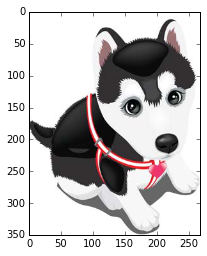

In [3]:
image = get_image_from_url(image_url)
show(image)

# Let's look at the size of the image.

In [4]:
(original_height, original_width) = get_size(image)
print 'Width:', original_width, 'pixels'
print 'Height:', original_height, 'pixels'

Width: 269 pixels
Height: 350 pixels


# We can use the width and height to calculate an aspect ratio.

In [5]:
aspect_ratio = original_width/original_height
print 'Aspect Ratio:', aspect_ratio

Aspect Ratio: 0.768571428571


# The ratio will help us resize the image.

In [28]:
new_width=40
new_height = int(new_width / aspect_ratio)

print 'New Width:', new_width, 'pixels'
print 'New Height:', new_height, 'pixels'

New Width: 40 pixels
New Height: 52 pixels


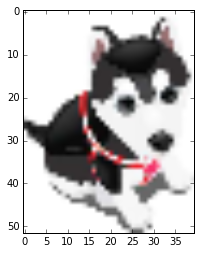

In [29]:
small_image = resize_image(image, new_width, new_height)
show(small_image)

# Let's compare with the original.

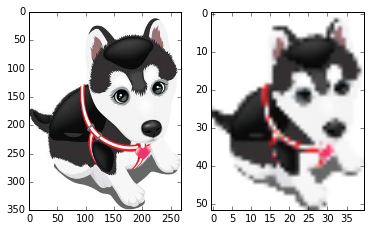

In [8]:
show(image, small_image)

# We need to make the image black and white.

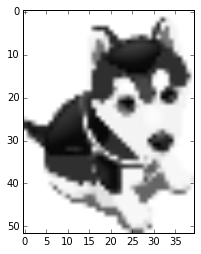

In [12]:
gray_image = convert_image_to_grayscale(small_image)
show(gray_image)

# We can see how gray each pixel is as a number.

In this case, 0 is black and 255 is white.

In [13]:
pixels_in_image = get_image_values(gray_image)
print pixels_in_image

[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 250, 251, 253, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 242, 53, 224, 250, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 47, 253, 243, 243, 251, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 91, 36, 50, 48, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 118, 45, 236, 112, 242, 244, 255, 255, 255, 255, 255, 2

# Here are some characters we want to map the gray values to.

In [14]:
ASCII_A = [ '..', '%%', '@@', '??', 'SS', '++', '..', '**', '::', ',,', '..']
ASCII_B = [ '##', '??', '%%', '..', 'SS', '++', '..', '**', '::', ',,', '@@']
ASCII_C = [ '##', '??', '%%', '..', 'SS', '++', '..', '**', '::', ',,', '..']
ASCII_D = ["$$","@@","BB","%%","88","&&","WW","MM","##","**","oo","aa","hh","kk","bb","dd","pp","qq","ww","mm","ZZ","OO","00","QQ","LL","CC","JJ","UU","YY","XX","zz","cc","vv","uu","nn","xx","rr","jj","ff","tt","//","\\","||","((","))","11","{{","}}","[[","]]","??","--","__","++","~~","<<",">>","ii","!!","ll","II",";;","::",",,",'""',"^^","``","''","..","  "]

# Pick one to be the one you use.

In [15]:
ASCII_CHARS = ASCII_D

# Then, we can calculate the index based on the pixel value

In [19]:
pixels_to_chars = []
for pixel_value in pixels_in_image:
    ascii_char_for_pixel = get_ascii_for_pixel_value(pixel_value, ASCII_CHARS)
    add_to_list(pixels_to_chars, ascii_char_for_pixel)

print pixels_to_chars

['..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', "''", "''", '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '^^', 'bb', 'II', "''", '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', 'hh', '..', '^^', '^^', "''", '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..

Right now, we are pretty close.

# We need to reshape this one big list a rectangle with the expected pixel width and height.

In [18]:
ascii_width = new_width * len(ASCII_CHARS[0])
ascii_art = reshape_list(pixels_to_chars, ascii_width)
print ascii_art

................................................................................
..............................................................''''..............
..............................................................^^bbII''..........
..............................................................hh..^^^^''........
................................LL**kkhh....................cchh,,zz^^^^........
................................``^^""hhhh..................hhXXvvuu^^^^........
..............................``^^``^^??hhaa....''))ttbbJJ!!bb;;uuvv""^^........
..............................^^^^vv++^^aaaaqqLLWWaahhkkhh**88kkJJvvuu``''......
..............................^^;;vvvv^^zzhh##bbppppppppbbkkaaMMkkYYvv^^``......
..............................""~~vvcc__MMoohhbbddbbbbkkhhoo##&&oohhpp""""......
..............................^^vvuuhhkkMMaaaaaaaaaaaaoo##MM88BBkkhhkkUU``......
..............................""vvzzaa&&&&MMMM######MMWW&&%%BBbbkkhhhhhhaa''....
............................

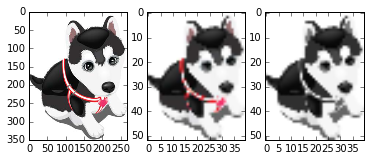

................................................................................
..............................................................''''..............
..............................................................^^bbII''..........
..............................................................hh..^^^^''........
................................LL**kkhh....................cchh,,zz^^^^........
................................``^^""hhhh..................hhXXvvuu^^^^........
..............................``^^``^^??hhaa....''))ttbbJJ!!bb;;uuvv""^^........
..............................^^^^vv++^^aaaaqqLLWWaahhkkhh**88kkJJvvuu``''......
..............................^^;;vvvv^^zzhh##bbppppppppbbkkaaMMkkYYvv^^``......
..............................""~~vvcc__MMoohhbbddbbbbkkhhoo##&&oohhpp""""......
..............................^^vvuuhhkkMMaaaaaaaaaaaaoo##MM88BBkkhhkkUU``......
..............................""vvzzaa&&&&MMMM######MMWW&&%%BBbbkkhhhhhhaa''....
............................

In [2]:
display(convert_image_to_ascii)